# Final Project

## Introduction
Our project aims to determine the best neighborhood in Pittsburgh through unconventional means. We all thought that other groups would use "positive" data sets like highest income, highest property value etc. While this is valid and probably a common approach we decided to use an unconventional one. We mostly looked for data sets that looked at negative aspects. This was our approach right away after the first data set we looked at was one about arrests by neighborhood.  We always intended to take this "negative" approach and never really explored alternatives, though later on we added a positive data set as well. After we all searched for data sets we ended up finding some perfect for our project and settled on median age at death, number of parks, and arrests. Later on we will go into our metric and submetrics in more detail, but we came up with our metric by combining these submetrics and comibining the neighborhoods "score" for each submetric to determine the best neighborhood in Pittsburgh

## The Metric
Our metric combines three submetrics from three different data sets. The first metric uses the median age at death by neighborhood dataset. The submetric rates each neighborhood on a 0-100 scale based on its reported median age at death. The second submetric looks at arrests by incident location and ranks them in reverse order. The third submetric counts the parks in each neighborhood. All of these submetrics combine to to create our overall metric based on the death age, arrests, and number of parks of each nieghborhood in Pittsburgh to determine the best one. 

## The Best Neighborhood

### Submetric 1: Median Age at Death by Neighborhood
There is a strong correlation between median age at death and development at the country level. The most developed Western Countries have a much higher median age of death than non-Western countries. We sought to apply this logic on a much smaller level. 

First I will get the max and the min of the total median age at death. Next, I used the max and min to find a range of values so that I could scale all the total median age at death values from 0-100 to give each neighborhood a score. The higher the score indicates the higher the median death age in relation to the other neighborhoods in Pittsburgh. Let's execute the code: 

In [7]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
data = pd.read_csv('mediandeathage.csv')  
data.fillna(0, inplace=True)
index = 1

for index, row in data.iterrows():
    if row['TOTAL MD AGE AT DEATH']=="0":
        data = data.drop([index])
    if row['TOTAL MD AGE AT DEATH']==0:
        data = data.drop([index])
    index = index + 1

min = 100
for index, row in data.iterrows():
    if row['TOTAL MD AGE AT DEATH']< min:
        min = row['TOTAL MD AGE AT DEATH']

max = 0
for index, row in data.iterrows():
    if row['TOTAL MD AGE AT DEATH']> max:
        max = row['TOTAL MD AGE AT DEATH']
    
range = max-min
list = []
for index, row in data.iterrows():
    value = ((row['TOTAL MD AGE AT DEATH']-53.3)/range)*100
    list.append(value)
    
data['Score'] = list
data = data.sort_values(by=['Score'], ascending=False)
data.head(10)

,NEIGHBORHOOD,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH,Score
89,SQUIRREL HILL SOUTH,58.0,83.2,721.0,86.2,802.0,85.9,100.000000
76,NORTH OAKLAND,45.0,70.9,227.0,86.8,279.0,85.6,99.079755
71,BANKSVILLE,4.0,0.0,247.0,85.5,253.0,85.5,98.773006
53,POINT BREEZE,13.0,66.7,158.0,85.7,175.0,85.1,97.546012
68,SQUIRREL HILL NORTH,6.0,75.0,231.0,85.3,242.0,85.0,97.239264
20,CENTRAL OAKLAND,2.0,0.0,50.0,84.0,52.0,84.0,94.171779
28,NEW HOMESTEAD,4.0,0.0,67.0,83.8,71.0,83.4,92.331288
27,SWISSHELM PARK,0.0,0.0,67.0,83.1,67.0,83.1,91.411043
77,OVERBROOK,4.0,0.0,284.0,82.5,289.0,82.2,88.650307
83,SHADYSIDE,72.0,81.2,320.0,82.4,406.0,82.1,88.343558


After executing the code using the logic explained above we can see the top 10 neighborhoods in terms of median age at death being the highest in relation to each other. The calculated score will be used in our overall metric.

### Submetric 2: Neighborhoods with the least crime

The dataset I used is City of Pittsburgh Arrests by Incident Location. I plan to find the neighborhoods with the most arrests and least arrests in order to find the safest neighborhood in Pittsburgh.

Firstly, I will sort fill a dictionary with all the names of neighborhoods and how many times they popped up in the incident location data. Higher arrest numbers are generally correlated with lower quality of living and a neighborhood less favorable.


In [2]:
metric = pd.read_csv('Arrests_by_Incident_location.csv')
metric.fillna(0, inplace=True)
index = 1
Crime_dict = {}

zero_counter = 0

for index, row in metric.iterrows():
    if row["INCIDENTNEIGHBORHOOD"] == 0:
        zero_counter += 1
    elif row["INCIDENTNEIGHBORHOOD"].upper() not in Crime_dict:
        Crime_dict[row["INCIDENTNEIGHBORHOOD"].upper()] = 1
    elif row["INCIDENTNEIGHBORHOOD"].upper() in Crime_dict:
        Crime_dict[row["INCIDENTNEIGHBORHOOD"].upper()] += 1

for key in Crime_dict:
    print(key,':',Crime_dict[key])

sorted_crime_dict = sorted(Crime_dict.items(), key=lambda x: x[1], reverse= False)



    

BLOOMFIELD : 7
OUTSIDE CITY : 1
WESTWOOD : 2
EAST ALLEGHENY : 10
CRAFTON HEIGHTS : 5
GREENFIELD : 2
BROOKLINE : 7
REGENT SQUARE : 1
EAST LIBERTY : 4
EAST HILLS : 3
CARRICK : 8
ALLEGHENY CENTER : 3
SOUTH SIDE FLATS : 15
SHERADEN : 7
EAST CARNEGIE : 1
GOLDEN TRIANGLE/CIVIC ARENA : 10
POINT BREEZE NORTH : 2
PERRY SOUTH : 2
ALLENTOWN : 3
NORTH SHORE : 5
MARSHALL-SHADELAND : 4
CENTRAL OAKLAND : 5
MIDDLE HILL : 3
STRIP DISTRICT : 3
LINCOLN-LEMINGTON-BELMAR : 3
CENTRAL NORTHSIDE : 3
TROY HILL-HERRS ISLAND : 1
HIGHLAND PARK : 2
HOMEWOOD NORTH : 8
NORTHVIEW HEIGHTS : 4
BRIGHTON HEIGHTS : 1
HAZELWOOD : 2
PERRY NORTH : 1
BEDFORD DWELLINGS : 3
ELLIOTT : 5
BEECHVIEW : 4
FINEVIEW : 4
GLEN HAZEL : 3
SPRING HILL-CITY VIEW : 2
BLUFF : 3
MANCHESTER : 1
HOMEWOOD WEST : 4
OUTSIDE COUNTY : 1
POINT BREEZE : 1
HOMEWOOD SOUTH : 4
SQUIRREL HILL SOUTH : 2
TERRACE VILLAGE : 1
UPPER LAWRENCEVILLE : 2
ARLINGTON : 1
SOUTH SIDE SLOPES : 2
LOWER LAWRENCEVILLE : 1
GARFIELD : 1
LINCOLN PLACE : 1
LARIMER : 1
MOUNT WASHI

From the output above, It shows the neighborhoods in Pittsburgh and their respective crime incidents. I will use metrics provided by my other group members to compare and decide the best neighborhood in Pittsburgh.

### Submetric 3:

This dataset provides information on parks in the city of Pittsburgh. It was compiled by the Department of Public Works. It includes ID, name of park, type of park, who is responsible for the maintenance, an image of the park, the neighborhood the park is in, the council district the park is in, the ward, the tract, the public works division, the pli division, the police and fire zone, and the latitude and longitude. For our purposes, we will mostly be looking at the neighborhood the parks are in.

I chose this dataset because parks are an important form of enrichment for people living anywhere. Having a large amount of parks is not only good for families with children, but for people in general. It is important to go outside and get fresh air, so living somewhere with a lot of parks makes this easy.


First, I will load our dataset to get an idea of what we are looking at. I will only load the park name and location columns.

In [3]:
import pandas as pd 
fields = ['name', 'neighborhood']
data1 = pd.read_csv('cityofpittsburghparks.csv', skipinitialspace=True, usecols=fields)   
data1.head(25)

,name,neighborhood
0,Able Long Park,Beechview
1,Albert Turk Graham Park,Crawford-Roberts
2,Alcoa Park,North Shore
3,Allegheny Commons,Allegheny Center
4,Allegheny Landing Park,North Shore
5,Allegheny Riverfront Park,Central Business District
6,Alpine Gardens Park,Central Northside
7,Alton Park,Beechview
8,Amber Triangle,East Liberty
9,Ammon Park,Bedford Dwellings


I want to know how many parks are in each neighborhood. To achieve this, I will count the occurances of each neighborhood in the dataset.

In [4]:
data1['neighborhood'].value_counts()

East Liberty                 12
Central Business District    10
Beechview                     8
South Side Slopes             7
Point Breeze                  7
                             ..
Hays                          1
Arlington                     1
Stanton Heights               1
Morningside                   1
Squirrel Hill North           1
Name: neighborhood, Length: 73, dtype: int64

### Combining the Submetrics:

For the submetric combination we will be using Submetric 1 as a basis. Submetric 2 will be subtracted from Submetric 1 to give each neighborhood a new score reflecting it's crime rate. Finally, Submetric 3 will be added to that new value to give each neighborhood a final score reflecting the amount of parks in that neighborhood.

In [5]:
main_metric = {}
park_dict = {}
zero_counter2 =0
for index, row in data1.iterrows(): #converting lauren's data to a dictionary
    if row["neighborhood"] == 0:
        zero_counter2 += 1
    elif row["neighborhood"].upper() not in park_dict:
        park_dict[row["neighborhood"].upper()] = 1
    elif row["neighborhood"].upper() in park_dict:
        park_dict[row["neighborhood"].upper()] += 1

for index, row in data.iterrows():
    main_metric[row['NEIGHBORHOOD']] = row['Score'] #converting Harry's data to a dictionary

revised_metric = {}
for key in main_metric:
   
    if key in Crime_dict:
        revised_metric[key] = main_metric[key] - Crime_dict[key]
    elif key in park_dict:
        revised_metric[key] = main_metric[key] + park_dict[key]
    if key in Crime_dict and key in park_dict:
        revised_metric[key] = main_metric[key] - Crime_dict[key] + park_dict[key]


sorted_revised_metric = sorted(revised_metric.items(), key=lambda x: x[1], reverse= True) #sorting dictionary

top20 = []
top20scores = []
counter1 = 0
print("Top 20 neighborhoods in pittsburgh")
for key in sorted_revised_metric: 
    if counter1 == 10:
        break
    print(counter1+1, "- ",key[0], ":",revised_metric[key[0]])
    top20.append( key[0])
    top20scores.append(revised_metric[key[0]])
    counter1 +=1

print("\nBest neighborhood in Pittsburgh: ")

Top 20 neighborhoods in pittsburgh
1 -  SQUIRREL HILL SOUTH : 104.0
2 -  POINT BREEZE : 103.54601226993861
3 -  NORTH OAKLAND : 100.07975460122695
4 -  BANKSVILLE : 99.77300613496931
5 -  SQUIRREL HILL NORTH : 98.23926380368097
6 -  SWISSHELM PARK : 94.41104294478525
7 -  NEW HOMESTEAD : 93.33128834355828
8 -  CENTRAL OAKLAND : 93.17177914110428
9 -  UPPER HILL : 88.11656441717791
10 -  CENTRAL LAWRENCEVILLE : 86.88957055214722

Best neighborhood in Pittsburgh: 


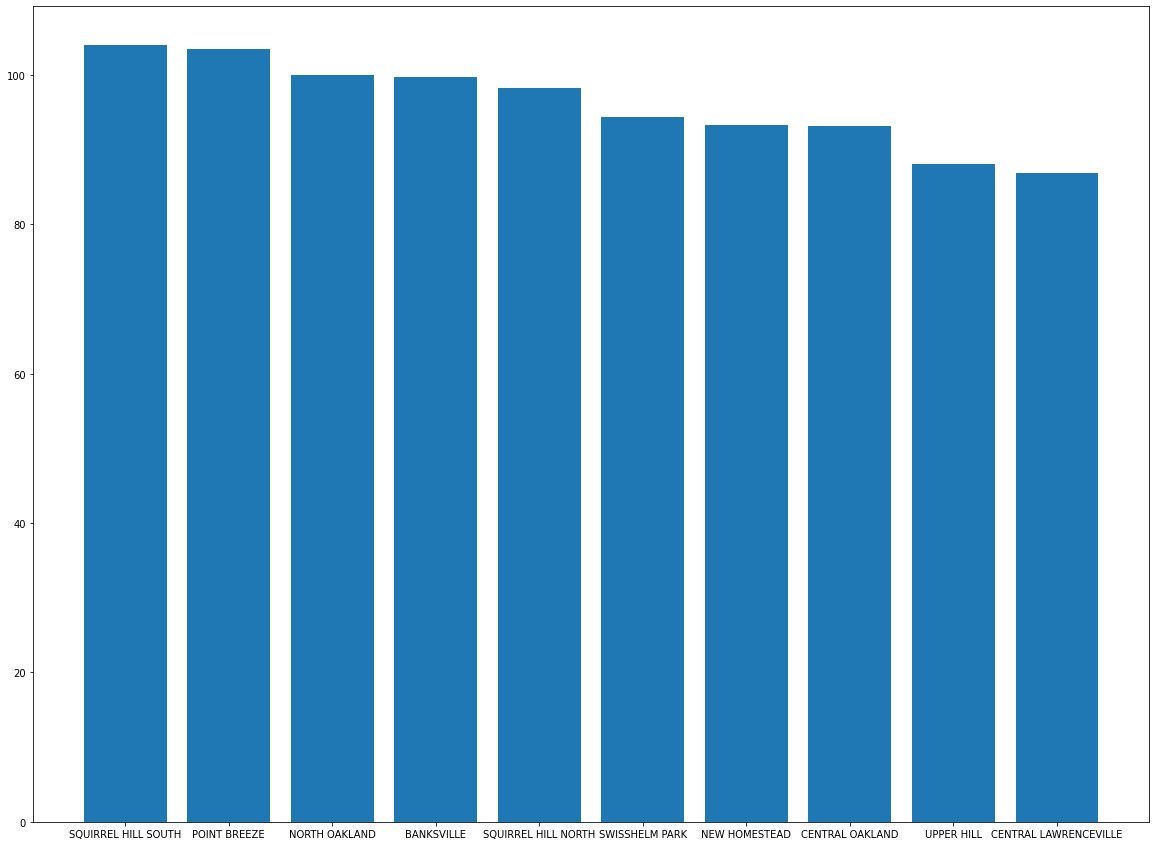

In [8]:
x = np.array(top20)
y = np.array(top20scores)

plt.figure(figsize=(20, 15))
plt.bar(x,y)
plt.show() 


**SQIURREL HILL SOUTH**

## Conclusion
### Conclusion Paragraph 1: Harry

My favorite neighborhood prior to this project was definitely Shady Side. I always thought of it as one of the nicer areas of Pittsburgh with great good and was especially surprised to not even see it in our top 20. The data driven arguement we used only takes into account death age, arrests, and parks to decide and for me I mostly just base my favorite neighborhood on proximity and food. It seems the data and I are at a disagreement, just different priorities I guess. 

### Conclusion Paragraph 2: David

Well I had no favorite neighborhood before I saw the data presented in my metric. But now I know that Squirrel Hill South is the best neighborhood, I will try my best to live there in the future. If I am unable to live in Squirrel Hill South, I'll just make my decision according to the list.

### Conclusion Paragraph 3: Lauren

I was surprised that Squirrel Hill South ended up on top because it is a neighborhood I have never heard of before. My personal favorite neighborhood is Shadyside because there are a lot of stores and resturants that I like. However, if I were to live somewhere in Pittsburgh, I think the submetrics we chose would we very important in making my choice. There is a very important distinction between visitng a neighborhood to go shopping and actually living in that neighborhood. Thus, it makes sense that the actual best neighborhood differed from my favorite neighborhood. 